### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [ ]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install numpy
# %pip install pomegranate
# %pip install torch
# %pip install Pillow

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pomegranate.distributions import Categorical, ConditionalCategorical
from pomegranate.bayesian_network import BayesianNetwork
import torch
from PIL import Image

## Dataset Import

### The dataset used to compute the Bayesian Network was downloaded form the website mentioned in a '.csv' format. Using the pandas library and the built in methods it is possible to read the file into a pandas DataFrame (the 'df' variable). Through the display method it is possible to see both the head and the tail of the dataset.

In [ ]:
df = pd.read_csv("diabetes_data_upload.csv")
display(df)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df.isna().sum().sort_values(ascending=False)

Age                   0
Itching               0
Obesity               0
Alopecia              0
muscle stiffness      0
partial paresis       0
delayed healing       0
Irritability          0
visual blurring       0
Gender                0
Genital thrush        0
Polyphagia            0
weakness              0
sudden weight loss    0
Polydipsia            0
Polyuria              0
class                 0
dtype: int64

<br><br>

## Exploratory analysis

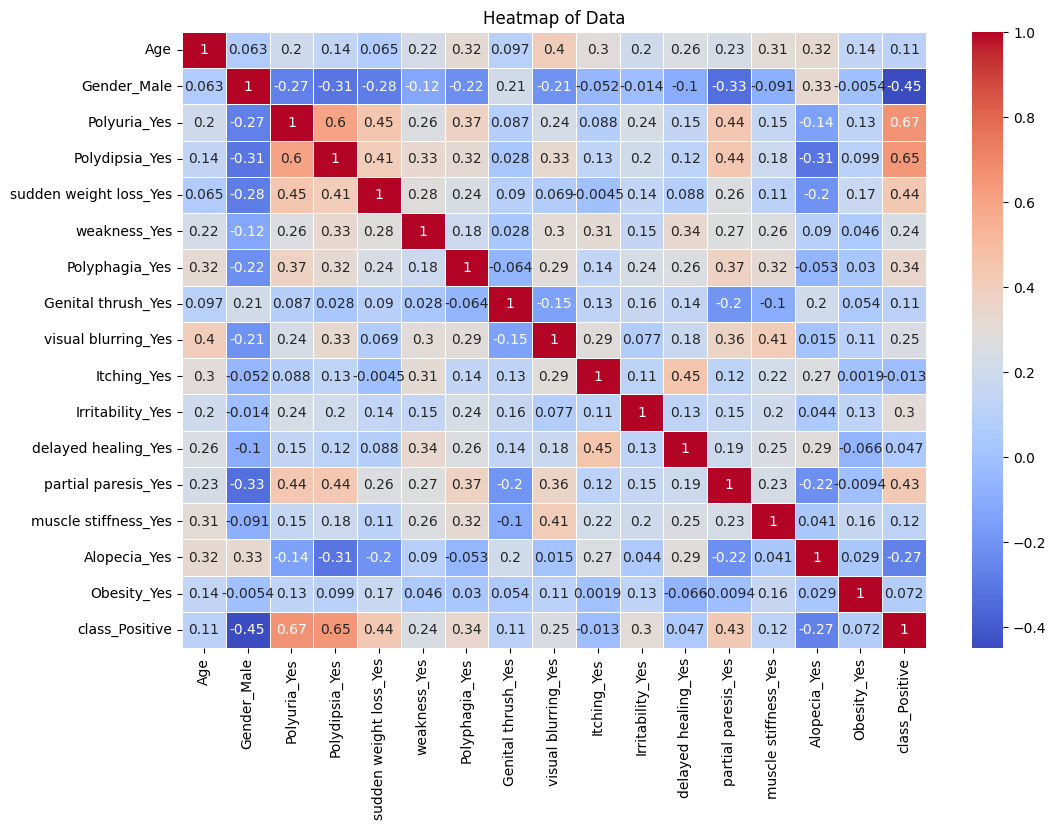

In [ ]:
df = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Data")
plt.show()

In [ ]:
df['Partial_Paresis_Yes'] = df['partial paresis_Yes']
df['Weight_Loss_Yes'] = df['sudden weight loss_Yes']
df['Diabetes_Yes'] = df['class_Positive']
columns_to_drop = ['Age','weakness_Yes','Genital thrush_Yes','visual blurring_Yes','Itching_Yes','Irritability_Yes','delayed healing_Yes','muscle stiffness_Yes','Alopecia_Yes','partial paresis_Yes','sudden weight loss_Yes','class_Positive']
df.drop(columns = columns_to_drop, inplace = True)
display(df)

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,Polyphagia_Yes,Obesity_Yes,Partial_Paresis_Yes,Weight_Loss_Yes,Diabetes_Yes
0,1,0,1,0,1,0,0,1
1,1,0,0,0,0,1,0,1
2,1,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,1,1
516,0,1,1,1,0,1,1,1
517,0,1,1,1,1,1,1,1
518,0,0,0,0,0,0,0,0


##Probability Distribution

In [ ]:
m = len(df)
sort_order = [1,0]
gender_classes = sorted(df['Gender_Male'].unique(), key=lambda x: sort_order.index(x))
polyuria_classes = sorted(df['Polyuria_Yes'].unique(), key=lambda x: sort_order.index(x))
polydipsia_classes = sorted(df['Polydipsia_Yes'].unique(), key=lambda x: sort_order.index(x))
polyphagia_classes = sorted(df['Polyphagia_Yes'].unique(), key=lambda x: sort_order.index(x))
obesity_classes = sorted(df['Obesity_Yes'].unique(), key=lambda x: sort_order.index(x))
partial_paresis_classes = sorted(df['Partial_Paresis_Yes'].unique(), key=lambda x: sort_order.index(x))
weight_loss_classes = sorted(df['Weight_Loss_Yes'].unique(), key=lambda x: sort_order.index(x))
diabetes_classes = sorted(df['Diabetes_Yes'].unique(), key=lambda x: sort_order.index(x))

In [ ]:
prob_gender = {}
for i in gender_classes:
    prob = (df['Gender_Male'] == i).sum()/m
    prob_gender[str(i)] = prob
    print('Probability -> gender_{} : {}'.format(str(i),prob))

Probability -> gender_1 : 0.6307692307692307
Probability -> gender_0 : 0.36923076923076925


In [ ]:
prob_polyuria = {}
for i in polyuria_classes:
    prob = (df['Polyuria_Yes'] == i).sum()/m
    prob_polyuria[str(i)] = prob
    print('Probability -> polyuria_{} : {}'.format(str(i),prob))

Probability -> polyuria_1 : 0.49615384615384617
Probability -> polyuria_0 : 0.5038461538461538


In [ ]:
prob_polydipsia = {}
for i in polyuria_classes:
    for j in polydipsia_classes:
        prob = ((df['Polyuria_Yes'] == i) & (df['Polydipsia_Yes'] == j)).sum()/(df['Polyuria_Yes'] == i).sum()
        prob_polydipsia[str(j)+','+str(i)] = prob
        print('Probability -> polyuira_{} | polydipsia_{} : {}'.format(str(j),str(i),prob))

Probability -> polyuira_1 | polydipsia_1 : 0.748062015503876
Probability -> polyuira_0 | polydipsia_1 : 0.25193798449612403
Probability -> polyuira_1 | polydipsia_0 : 0.15267175572519084
Probability -> polyuira_0 | polydipsia_0 : 0.8473282442748091


In [ ]:
prob_polyphagia = {}
for i in polyphagia_classes:
    prob = (df['Polyphagia_Yes'] == i).sum()/m
    prob_polyphagia[str(i)] = prob
    print('Probability -> polyphagia_{} : {}'.format(str(i),prob))

Probability -> polyphagia_1 : 0.45576923076923076
Probability -> polyphagia_0 : 0.5442307692307692


In [ ]:
prob_obesity = {}
for i in polyphagia_classes:
    for j in obesity_classes:
        prob = ((df['Polyphagia_Yes'] == i) & (df['Obesity_Yes'] == j)).sum()/(df['Polyphagia_Yes'] == i).sum()
        prob_obesity[str(j)+','+str(i)] = prob
        print('Probability -> obesity_{} | polyphagia_{} : {}'.format(str(j),str(i),prob))

Probability -> obesity_1 | polyphagia_1 : 0.18143459915611815
Probability -> obesity_0 | polyphagia_1 : 0.8185654008438819
Probability -> obesity_1 | polyphagia_0 : 0.15901060070671377
Probability -> obesity_0 | polyphagia_0 : 0.8409893992932862


In [ ]:
prob_partial_paresis = {}
for i in partial_paresis_classes:
    prob = (df['Partial_Paresis_Yes'] == i).sum()/m
    prob_partial_paresis[str(i)] = prob
    print('Probability -> partial_paresis_{} : {}'.format(str(i),prob))

Probability -> partial_paresis_1 : 0.4307692307692308
Probability -> partial_paresis_0 : 0.5692307692307692


In [ ]:
prob_weight_loss = {}
for i in polyuria_classes:
    for j in partial_paresis_classes:
        for k in weight_loss_classes:
            prob = ((df['Polyuria_Yes'] == i) & (df['Partial_Paresis_Yes'] == j) & (df['Obesity_Yes'] == k)).sum()/((df['Polyuria_Yes'] == i) & (df['Partial_Paresis_Yes'] == j)).sum()
            prob_weight_loss[str(k)+','+str(i)+','+str(j)] = prob
            print('Probability -> weight_loss_{} | (polyuria_{}, partial_paresis_{}) : {}'.format(str(k),str(i),str(j),prob))

Probability -> weight_loss_1 | (polyuria_1, partial_paresis_1) : 0.16071428571428573
Probability -> weight_loss_0 | (polyuria_1, partial_paresis_1) : 0.8392857142857143
Probability -> weight_loss_1 | (polyuria_1, partial_paresis_0) : 0.32222222222222224
Probability -> weight_loss_0 | (polyuria_1, partial_paresis_0) : 0.6777777777777778
Probability -> weight_loss_1 | (polyuria_0, partial_paresis_1) : 0.17857142857142858
Probability -> weight_loss_0 | (polyuria_0, partial_paresis_1) : 0.8214285714285714
Probability -> weight_loss_1 | (polyuria_0, partial_paresis_0) : 0.10679611650485436
Probability -> weight_loss_0 | (polyuria_0, partial_paresis_0) : 0.8932038834951457


In [ ]:
prob_diabetes = {}
for i in obesity_classes:
    for j in polydipsia_classes:
        for k in weight_loss_classes:
            for n in gender_classes:
                for m in diabetes_classes:
                    prob = ((df['Obesity_Yes'] == i) & (df['Polydipsia_Yes'] == j) & (df['Weight_Loss_Yes'] == k) & (df['Gender_Male'] == n) & (df['Diabetes_Yes'] == m)).sum() / ((df['Obesity_Yes'] == i) & (df['Polydipsia_Yes'] == j) & (df['Weight_Loss_Yes'] == k) & (df['Gender_Male'] == n)).sum()
                    prob_diabetes[str(m)+','+str(i)+','+str(j)+','+str(k)+','+str(n)] = prob
                    print('Probability -> Diabetes_{} | (Obesity_{}, Polydipsia_{}, Weight_Loss_{}, Gender_{}) : {}'.format(str(m),str(i),str(j),str(k),str(n),prob))


Probability -> Diabetes_1 | (Obesity_1, Polydipsia_1, Weight_Loss_1, Gender_1) : 1.0
Probability -> Diabetes_0 | (Obesity_1, Polydipsia_1, Weight_Loss_1, Gender_1) : 0.0
Probability -> Diabetes_1 | (Obesity_1, Polydipsia_1, Weight_Loss_1, Gender_0) : 1.0
Probability -> Diabetes_0 | (Obesity_1, Polydipsia_1, Weight_Loss_1, Gender_0) : 0.0
Probability -> Diabetes_1 | (Obesity_1, Polydipsia_1, Weight_Loss_0, Gender_1) : 0.9090909090909091
Probability -> Diabetes_0 | (Obesity_1, Polydipsia_1, Weight_Loss_0, Gender_1) : 0.09090909090909091
Probability -> Diabetes_1 | (Obesity_1, Polydipsia_1, Weight_Loss_0, Gender_0) : 1.0
Probability -> Diabetes_0 | (Obesity_1, Polydipsia_1, Weight_Loss_0, Gender_0) : 0.0
Probability -> Diabetes_1 | (Obesity_1, Polydipsia_0, Weight_Loss_1, Gender_1) : 0.0
Probability -> Diabetes_0 | (Obesity_1, Polydipsia_0, Weight_Loss_1, Gender_1) : 1.0
Probability -> Diabetes_1 | (Obesity_1, Polydipsia_0, Weight_Loss_1, Gender_0) : 1.0
Probability -> Diabetes_0 | (Obesi

In [ ]:
prob_gender = np.array(list(prob_gender.values()))
prob_polyuria = np.array(list(prob_polyuria.values()))
prob_polydipsia = np.array(list(prob_polydipsia.values())).reshape(2,2)
prob_polyphagia = np.array(list(prob_polyphagia.values()))
prob_obesity = np.array(list(prob_obesity.values())).reshape(2,2)
prob_partial_paresis = np.array(list(prob_partial_paresis.values()))
prob_weight_loss = np.array(list(prob_weight_loss.values())).reshape(2,2,2)
prob_diabetes = np.array(list(prob_diabetes.values())).reshape(2,2,2,2,2)

In [ ]:
gender = Categorical([prob_gender])
polyuria = Categorical([prob_polyuria])
polydipsia = ConditionalCategorical([prob_polydipsia])
polyphagia = Categorical([prob_polyphagia])
obesity = ConditionalCategorical([prob_obesity])
partial_paresis = Categorical([prob_partial_paresis])
weight_loss = ConditionalCategorical([prob_weight_loss])
diabetes = ConditionalCategorical([prob_diabetes])

c:\Users\diogo\anaconda3\Lib\site-packages\pomegranate\_utils.py:62: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(value)


## **Bayesian** **Network** **Model**

In [ ]:
bnModel = BayesianNetwork([gender,polyuria,partial_paresis,polyphagia,polydipsia,obesity,weight_loss,diabetes],
                          [(polyuria,polydipsia),(polyuria,weight_loss),(partial_paresis,weight_loss),(polyphagia,obesity),(obesity,diabetes),(polydipsia,diabetes),(weight_loss,diabetes),(gender,diabetes)])

States = ['gender','polyuria','partial_paresis','polyphagia','polydipsia','obesity','weight_loss','diabetes']

Choices = [
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"],
    ["?", "1", "0"]
]

<br><br>

## Analysis of example 1

In [ ]:
Situations = [
              ["1","1","1","0","1","0","1","?"],
              ["0","1","1","0","1","0","1","?"],
              ["?","1","1","1","0","1","0","?"],
             ]
C = [[Choices[i].index(situation[i])-1 for i in range(len(situation))] for situation in Situations]
print(f"Situations = {Situations}")
print(f"Situations_mask = {C}")

X = torch.tensor(C)
X_masked = torch.masked.MaskedTensor(X, mask = X>=0)

def uniqueChoice(probs):
    return len([i for i,j in enumerate(probs) if j==max(probs)])==1

print('{')
a = bnModel.predict(X_masked)
print(a)
results = a.tolist()
beliefs = [x.tolist() for x in bnModel.predict_proba(X_masked)]
predicts = []
for ii in range(len(results)):
  result = results[ii]
  ss = Situations[ii]
  print(f'  "question{ii+1:02d}": {{')
  print(f'    "situation": {["{}={}".format(States[j],ss[j]) for j in range(len(ss))]}')
  RR = [[option,state,Choices[States.index(state)][choice+1],beliefs[States.index(state)][ii]] for state,choice,option in zip(States, result,Situations[ii])]
  print('    "inference": [')
  print('\n'.join('      {{"state": "{}", "choice": "{}", "probabilities": {}, "unique": {}}},'.format(x[1],x[2],x[3],uniqueChoice(x[3])) for x in RR if x[0]=='?'))
  predicts.append([x[2] for x in RR if x[0]=='?'])
  print('    ],')
  print('  },')
print('}')

Situations = [['1', '1', '1', '0', '1', '0', '1', '?'], ['0', '1', '1', '0', '1', '0', '1', '?'], ['?', '1', '1', '1', '0', '1', '0', '?']]
Situations_mask = [[0, 0, 0, 1, 0, 1, 0, -1], [1, 0, 0, 1, 0, 1, 0, -1], [-1, 0, 0, 0, 1, 0, 1, -1]]
{


c:\Users\diogo\anaconda3\Lib\site-packages\torch\masked\maskedtensor\core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


tensor([[0, 0, 0, 1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1]])
  "question01": {
    "situation": ['gender=1', 'polyuria=1', 'partial_paresis=1', 'polyphagia=0', 'polydipsia=1', 'obesity=0', 'weight_loss=1', 'diabetes=?']
    "inference": [
      {"state": "diabetes", "choice": "1", "probabilities": [0.930232584476471, 0.06976744532585144], "unique": True},
    ],
  },
  "question02": {
    "situation": ['gender=0', 'polyuria=1', 'partial_paresis=1', 'polyphagia=0', 'polydipsia=1', 'obesity=0', 'weight_loss=1', 'diabetes=?']
    "inference": [
      {"state": "diabetes", "choice": "1", "probabilities": [1.0, 0.0], "unique": True},
    ],
  },
  "question03": {
    "situation": ['gender=?', 'polyuria=1', 'partial_paresis=1', 'polyphagia=1', 'polydipsia=0', 'obesity=1', 'weight_loss=0', 'diabetes=?']
    "inference": [
      {"state": "gender", "choice": "1", "probabilities": [0.6307692527770996, 0.3692307770252228], "unique": True},
      {"state"

## Model Accuracy

In [ ]:
Situations = []
for i in range(len(df)):
    Situations.append([str(df.iloc[i,0]),str(df.iloc[i,1]),str(df.iloc[i,2]),str(df.iloc[i,3]),str(df.iloc[i,4]),str(df.iloc[i,5]),str(df.iloc[i,6]),"?"])

C = [[Choices[i].index(situation[i])-1 for i in range(len(situation))] for situation in Situations]
X = torch.tensor(C)
X_masked = torch.masked.MaskedTensor(X, mask = X>=0)

def uniqueChoice(probs):
    return len([i for i,j in enumerate(probs) if j==max(probs)])==1

a = bnModel.predict(X_masked)
results = a.tolist()
beliefs = [x.tolist() for x in bnModel.predict_proba(X_masked)]
predicts = []
for ii in range(len(results)):
  result = results[ii]
  ss = Situations[ii]
  RR = [[option,state,Choices[States.index(state)][choice+1],beliefs[States.index(state)][ii]] for state,choice,option in zip(States, result,Situations[ii])]
  predicts.append([x[2] for x in RR if x[0]=='?'])

labels = np.array(df.iloc[:,-1], dtype=int)
predicts = np.array(predicts, dtype=int).reshape(len(df))
acc = round((labels == predicts).sum()/len(df)*100,2)
print('Bayesian Network Accuracy: {}%'.format(acc))

Bayesian Network Accuracy: 65.19%


<br><br>

## Analysis of example 2

In [ ]:
Situations = [
              ["?","1","1","1","1","1","1","0"]
             ]
C = [[Choices[i].index(situation[i])-1 for i in range(len(situation))] for situation in Situations]
print(f"Situations = {Situations}")
print(f"Situations_mask = {C}")

X = torch.tensor(C)
X_masked = torch.masked.MaskedTensor(X, mask = X>=0)

def uniqueChoice(probs):
    return len([i for i,j in enumerate(probs) if j==max(probs)])==1

print('{')
a = bnModel.predict(X_masked)
print(a)
results = a.tolist()
beliefs = [x.tolist() for x in bnModel.predict_proba(X_masked)]
predicts = []
for ii in range(len(results)):
  result = results[ii]
  ss = Situations[ii]
  print(f'  "question{ii+1:02d}": {{')
  print(f'    "situation": {["{}={}".format(States[j],ss[j]) for j in range(len(ss))]}')
  RR = [[option,state,Choices[States.index(state)][choice+1],beliefs[States.index(state)][ii]] for state,choice,option in zip(States, result,Situations[ii])]
  print('    "inference": [')
  print('\n'.join('      {{"state": "{}", "choice": "{}", "probabilities": {}, "unique": {}}},'.format(x[1],x[2],x[3],uniqueChoice(x[3])) for x in RR if x[0]=='?'))
  predicts.append([x[2] for x in RR if x[0]=='?'])
  print('    ],')
  print('  },')
print('}')

Situations = [['?', '1', '1', '1', '1', '1', '1', '0']]
Situations_mask = [[-1, 0, 0, 0, 0, 0, 0, 1]]
{
tensor([[0, 0, 0, 0, 0, 0, 0, 0]])
  "question01": {
    "situation": ['gender=?', 'polyuria=1', 'partial_paresis=1', 'polyphagia=1', 'polydipsia=1', 'obesity=1', 'weight_loss=1', 'diabetes=0']
    "inference": [
      {"state": "gender", "choice": "1", "probabilities": [nan, nan], "unique": False},
    ],
  },
}
